In [46]:
def create_cubic_data(file_name, n_segments):
    results_file = open(file_name)
    mss = -1
    cwnd_kbytes = []
    timestamps = [(10 * x / n_segments) for x in range(n_segments)]

    for i, line in enumerate(results_file):
        if i % 2 == 0:
            mss = int(line.strip())
        else:
            cwnd = int(line.strip())
            cwnd_kbytes.append(cwnd*mss / 1024)
    
    return cwnd_kbytes, timestamps

In [47]:
cwnd_kbytes_1, timestamps_1 = create_cubic_data("results3.txt", 1077)
cwnd_kbytes_2, timestamps_2 = create_cubic_data("results4.txt", 1118)

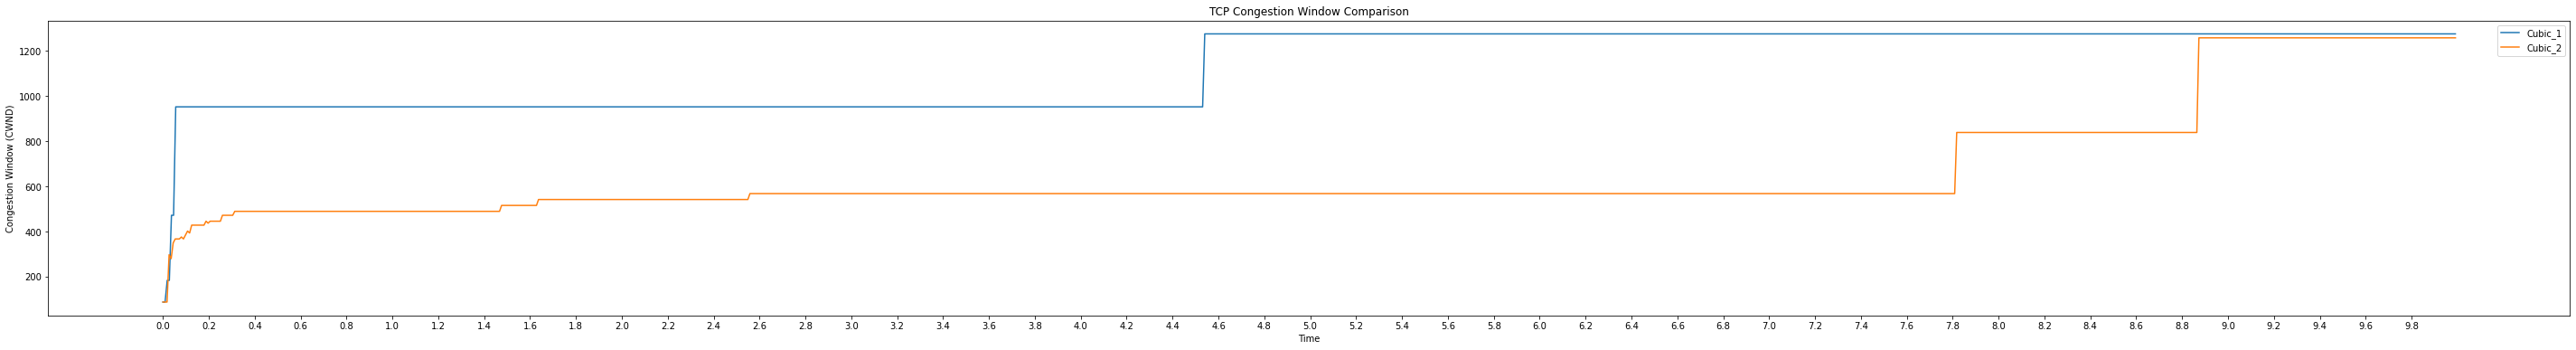

In [48]:
import matplotlib.pyplot as plt

# Load data
# cubic_data = [timestamps, cwnd_kbytes]

# Plot
plt.figure(figsize=(50, 6))
plt.plot(timestamps_1, cwnd_kbytes_1, label='Cubic_1')
plt.plot(timestamps_2, cwnd_kbytes_2, label='Cubic_2')
plt.xlabel('Time')
plt.ylabel('Congestion Window (CWND)')
plt.xticks([0.2*x for x in range(50)])
plt.title('TCP Congestion Window Comparison')
plt.legend()
plt.show()

In [ ]:
import re

# Input and output files
file = "results_4_bbr.txt"

# Regular expression to match each line with the required data
pattern = r"^\[\s*\d+\]\s+(\S+)\s+sec.*?(\d+\.\d+|\d+)\s+(KBytes|MBytes)"

# Conversion factors
conversion_factors = {"KBytes": 1024, "MBytes": 1024 * 1024}

# Open the input file and process lines
data = {}
with open(file, "r") as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            line = line.replace("   ", " ")
            line = line.replace("  ", " ")
            line_arr = line.split(" ")
            data[line_arr[2].split("-")[1]] = int(float(line_arr[9]) * conversion_factors[line_arr[10]])

print(f"Data extracted.")

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(data.keys())[:50], list(data.values())[:50], label="Congestion Window (cwnd)", color="blue", marker="o")
# plt.axhline(y=ssthresh, color="red", linestyle="--", label="Slow-Start Threshold (ssthresh)")

# Add labels and legend
plt.title("TCP Congestion Window (cwnd) Growth Over Time")
plt.xlabel("Time (RTTs)")
plt.ylabel("Congestion Window Size (MSS)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("results_4_bbr_plot.png")

# Show the plot
plt.show()